<h1> Imports </h1>

In [1]:
#imports
import numpy as np
import pandas as pd

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

import time
from datetime import date
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

<h1> Method definitions</h1>

In [5]:
def encode_onehot(df, column_name):
    return pd.get_dummies(df, columns=[column_name])

def minmax_scale(df, column_name):
    scaler = preprocessing.MinMacScaler()
    data = scaler.fit_transform(df[column_name])
    return scaler, data

def oversampling(df, column_name):
    oversampler = RandomOverSampler(sampling_strategy='auto', random_state=0)
    X = df.drop(column_name, axis=1)
    y = df[column_name]
    X_resampled, y_resampled = oversampler.fit_resample(X, y)
    resampled_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name=column_name)], axis=1)
    return resampled_df

def undersampling(df, column_name):
    undersampler = RandomUnderSampler(sampling_strategy=0.1, random_state=0)
    X = df.drop(columns=[column_name])
    y = df[column_name]
    
    X_undersampled, y_undersampled = undersampler.fit_resample(X, y)
    undersampled_df = pd.concat([pd.DataFrame(X_undersampled, columns=X.columns), pd.Series(y_undersampled, name=column_name)], axis=1)
    return undersampled_df

def calculateAgeWithDateOfBirth(df,column_name):
    #df[column_name]= df[column_name].strftime(df[column_name],'%Y-%m-%d').date()
    df[column_name] = pd.to_datetime(df[column_name], format='%Y-%m-%d')
    #df[column_name] = pd.to_datetime(df[column_name].dt.strftime('%Y-%m-%d'))
    print(type(df[column_name].iloc[1]))
    #current_date= datetime.now()
    current_date= pd.to_datetime(date.today())
    print(type(df[column_name].iloc[1]))
    print(df[column_name].iloc[1])
    
    df['age_in_years'] = (current_date - df[column_name]) // pd.Timedelta(365, 'D')
    df['age_in_years'] = df['age_in_years'].map(lambda x: int(x))
    
    return df

def makeGenderBinary(df, gender_column):
    df[gender_column]=df[gender_column].map(lambda x: 1 if x == 'M' else 0)
    return df

def replace(x):
    # the categorisation of jobs was done by hand according to EEO Job Categories
    # as all the 500+ different jobs were categorised by hand some errors may occur
    # The idea is to test out if the model could be improved by job categories
    jobstoremember = {'executive': ['Theatre director'],
                      'mid-level': ['Chief Executive Officer', 'Trading standards officer', 'Chief Strategy Officer', 'Public relations account executive', 'Facilities manager', 'Fisheries officer', 'Call centre manager', 'Heritage manager', 'Travel agency manager', 'Tourist information centre manager', 'Leisure centre manager', 'Production manager', 'Chief Operating Officer', 'Chief Technology Officer', 'Fitness centre manager', 'Health service manager', 'Chief Marketing Officer', 'Farm manager', 'Information systems manager', 'Theme park manager', 'Theatre manager', 'Emergency planning/management officer', 'Quarry manager', 'Records manager', 'Location manager', 'Stage manager', 'Chief of Staff', 'Field trials officer', 'Hotel manager', 'Civil Service administrator', 'Tour manager', 'Armed forces technical officer', 'Warehouse manager'],
                      'professionals': ['Film/video editor', 'Exhibition designer', 'Naval architect', 'Surveyor, land/geomatics', 'Materials engineer', 'Designer, ceramics/pottery', 'Systems developer', 'IT trainer', 'Financial adviser', 'Environmental consultant', 'Chartered public finance accountant', 'Scientist, audiological', 'Comptroller', 'Sub', 'Podiatrist', 'Agricultural consultant', 'Magazine features editor', 'Historic buildings inspector/conservation officer', 'Librarian, public', 'Building surveyor', 'Musician', 'Water engineer', 'Scientist, research (maths)', 'Mining engineer', 'Barrister', 'Audiological scientist', 'Immunologist', 'Clothing/textile technologist', 'Financial trader', 'Claims inspector/assessor', 'Energy engineer', 'Petroleum engineer', 'Quantity surveyor', 'Make', 'Engineer, automotive', 'Mechanical engineer', 'Geoscientist', 'Counsellor', 'Secondary school teacher', 'Land/geomatics surveyor', 'Early years teacher', 'Sales professional, IT', 'Pensions consultant', 'Psychologist, forensic', 'Psychotherapist, child', 'Librarian, academic', 'Research scientist (physical sciences)', 'Electrical engineer', 'Insurance underwriter', 'Science writer', 'Chartered loss adjuster', 'Drilling engineer', 'Engineer, biomedical', 'Trade mark attorney', 'Special educational needs teacher', 'Scientist, marine', 'Cytogeneticist', 'Chemical engineer', 'Multimedia programmer', 'Accounting technician', 'Counselling psychologist', 'Toxicologist', 'Engineer, production', 'Social researcher', 'Radio producer', 'Fine artist', 'Teacher, special educational needs', 'Race relations officer', 'Engineer, control and instrumentation', 'Surveyor, minerals', 'Educational psychologist', 'Ceramics designer', 'Advertising account planner', 'Town planner', 'Programme researcher, broadcasting/film/video', 'Surgeon', 'Futures trader', 'Television/film/video producer', 'Further education lecturer', 'Scientist, biomedical', 'Designer, industrial/product', 'Applications developer', 'Buyer, industrial', 'Curator', 'Lexicographer', 'Engineering geologist', 'Occupational psychologist', 'Herbalist', 'Pilot, airline', 'Press photographer', 'Archaeologist', 'Editor, commissioning', 'Forensic psychologist', 'Research officer, political party', 'Engineer, electronics', 'Dispensing optician', 'Broadcast presenter', 'Insurance risk surveyor', 'Exercise physiologist', 'Engineer, mining', 'Systems analyst', 'Chiropodist', 'Operations geologist', 'Lecturer, further education', 'Physicist, medical', 'Insurance broker', 'Learning disability nurse', 'Hospital doctor', 'Research officer, trade union', 'Private music teacher', 'Structural engineer', 'Amenity horticulturist', 'Psychologist, counselling', 'Colour technologist', 'Tree surgeon', 'Metallurgist', 'Geologist, engineering', 'Producer, radio', 'Arboriculturist', 'Phytotherapist', 'Education officer, museum', 'Journalist, newspaper', 'Occupational hygienist', 'Site engineer', 'Electronics engineer', 'Regulatory affairs officer', 'Video editor', 'Biomedical scientist', 'Licensed conveyancer', 'Press sub', 'Manufacturing engineer', 'Development worker, international aid', "Barrister's clerk", 'Camera operator', 'Commercial horticulturist', 'Music tutor', 'Health physicist', 'Product/process development scientist', 'Designer, exhibition/display', 'Engineer, land', 'Freight forwarder', 'Lecturer, higher education', 'Commercial/residential surveyor', 'Careers information officer', 'Energy manager', 'Osteopath', 'Wellsite geologist', 'Statistician', 'Market researcher', 'Risk analyst', "Nurse, children's", 'Doctor, general practice', 'Accountant, chartered public finance', 'Health and safety adviser', 'Programmer, multimedia', 'Soil scientist', 'Equality and diversity officer', 'Operational researcher', 'Therapist, sports', 'Building control surveyor', 'Chief Financial Officer', 'Media buyer', 'Database administrator', 'Optician, dispensing', 'Land', 'Mental health nurse', 'Web designer', 'Maintenance engineer', 'Doctor, hospital', 'Teacher, secondary school', 'Engineer, petroleum', 'Product designer', 'Paediatric nurse', 'Armed forces training and education officer', 'Waste management officer', 'Tax adviser', 'Geochemist', 'Investment analyst', 'Patent attorney', 'Therapist, horticultural', 'Surveyor, rural practice', 'Intelligence analyst', 'Teacher, early years/pre', 'Sports development officer', 'Neurosurgeon', 'Transport planner', 'Airline pilot', 'Retail buyer', 'Pension scheme manager', 'Scientist, physiological', 'Psychologist, sport and exercise', 'Landscape architect', 'Telecommunications researcher', 'Industrial/product designer', 'Animal nutritionist', 'Psychiatrist', 'Geologist, wellsite', 'Museum/gallery conservator', 'Clinical research associate', 'Sport and exercise psychologist', 'Editor, film/video', 'Clinical biochemist', 'Nutritional therapist', 'Museum/gallery exhibitions officer', 'Therapist, drama', 'Architect', 'Psychotherapist', 'Retail banker', 'Communications engineer', 'Animal technologist', 'Engineer, drilling', 'Scientist, research (physical sciences)', 'Furniture designer', 'Editor, magazine features', 'Public house manager', 'Cartographer', 'Health promotion specialist', 'Horticulturist, commercial', 'Biomedical engineer', 'Research scientist (life sciences)', 'Investment banker, corporate', 'Herpetologist', 'Public affairs consultant', 'Pharmacist, community', 'Arts development officer', 'Corporate investment banker', 'Civil engineer, contracting', 'Dance movement psychotherapist', 'Engineer, technical sales', 'General practice doctor', 'Health visitor', 'Animator', 'Medical physicist', 'Acupuncturist', 'Engineer, agricultural', 'Planning and development surveyor', 'Embryologist, clinical', 'Oceanographer', 'Pharmacologist', 'Special effects artist', 'Designer, interior/spatial', 'Psychologist, clinical', 'Orthoptist', 'Surveyor, mining', 'Network engineer', 'Psychiatric nurse', 'Training and development officer', 'Community pharmacist', 'Logistics and distribution manager', 'Equities trader', 'Field seismologist', 'Engineer, communications', 'Set designer', 'Interpreter', 'Research scientist (maths)', 'Therapist, music', 'Environmental health practitioner', 'Social research officer, government', 'Physiological scientist', 'Building services engineer', 'Garment/textile technologist', 'Management consultant', 'Engineer, maintenance', 'Aeronautical engineer', 'Commissioning editor', 'Hydrologist', 'Geophysicist/field seismologist', 'Archivist', 'Rural practice surveyor', 'Control and instrumentation engineer', 'Engineer, civil (contracting)', 'Chartered accountant', 'Teacher, primary school', 'Conservation officer, historic buildings', 'Media planner', 'Medical technical officer', 'Plant breeder/geneticist', 'Pharmacist, hospital', 'Scientist, clinical (histocompatibility and immunogenetics)', 'Designer, multimedia', 'Furniture conservator/restorer', 'Engineer, broadcasting (operations)', 'Designer, textile', 'Museum education officer', 'Pathologist', 'Economist', 'Academic librarian', 'Hydrographic surveyor', 'Hospital pharmacist', 'Presenter, broadcasting', 'Biochemist, clinical', 'Environmental education officer', 'Air broker', 'Retail manager', 'Engineer, building services', 'Production assistant, radio', 'Engineer, aeronautical', 'Insurance claims handler', 'Ecologist', 'Civil Service fast streamer', 'Architectural technologist', 'Chartered legal executive (England and Wales)', 'Outdoor activities/education manager', 'Nurse, mental health', 'Loss adjuster, chartered', 'Chemist, analytical', 'Research scientist (medical)', 'Programmer, applications', 'Teacher, English as a foreign language', 'Product manager', 'Clinical psychologist', 'IT consultant', 'Manufacturing systems engineer', 'Scientist, research (medical)', 'Geneticist, molecular', 'Engineer, civil (consulting)', 'Lawyer', 'Estate manager/land agent', 'Engineer, manufacturing', 'Designer, television/film set', 'Accountant, chartered certified', 'TEFL teacher', 'Magazine journalist', 'Horticultural consultant', 'Surveyor, hydrographic', 'Minerals surveyor', 'Associate Professor', 'Oncologist', 'Restaurant manager, fast food', 'Catering manager', 'Local government officer', 'Solicitor, Scotland', 'Broadcast engineer', 'Occupational therapist', 'Textile designer', 'Charity officer', 'Artist', 'Television camera operator', 'Engineer, materials', 'Public relations officer', 'Environmental manager', 'Data scientist', 'Conservator, museum/gallery', 'Teacher, adult education', 'Primary school teacher', 'Education officer, community', 'Nature conservation officer', 'Professor Emeritus', 'Investment banker, operational', 'Water quality scientist', 'Interior and spatial designer', 'Clinical cytogeneticist', 'Purchasing manager', 'Copy', 'Writer', 'Analytical chemist', 'Buyer, retail', 'English as a foreign language teacher', 'Producer, television/film/video', 'Engineer, structural', 'Hydrogeologist', 'Dancer', 'Air traffic controller', 'Legal secretary', 'Personnel officer', 'Engineer, site', 'Solicitor', 'Homeopath', 'Accountant, chartered', 'Industrial buyer', 'Broadcast journalist', 'Forest/woodland manager', 'Information officer', 'Veterinary surgeon', 'Ship broker', 'Contracting civil engineer'],
                      'technicians': ['Paramedic', 'Technical brewer', 'Radiographer, therapeutic', 'Radiographer, diagnostic', 'Gaffer', 'Scientific laboratory technician', 'Optometrist', 'Diagnostic radiographer', 'Production engineer', 'Teaching laboratory technician'],
                      'sales': ['Copywriter, advertising', 'Medical sales representative', 'Dealer', 'Retail merchandiser', 'Bookseller', 'Advertising account executive', 'Sales executive', 'Advertising copywriter', 'Visual merchandiser', 'Merchandiser, retail', 'Marketing executive', 'Sales promotion account executive'],
                      'administrative': ['Television production assistant', 'Radio broadcast assistant', 'Exhibitions officer, museum/gallery', 'Administrator', 'Television floor manager', 'Administrator, local government', 'Administrator, education', 'Human resources officer', 'Administrator, charities/voluntary organisations', 'Charity fundraiser', "Politician's assistant", 'Secretary/administrator', 'Volunteer coordinator', 'Medical secretary', 'Event organiser', 'Sports administrator', 'Company secretary', 'Education administrator', 'Administrator, arts', 'Production assistant, television'],
                      'craft': ['Designer, jewellery', 'Designer, furniture', 'Community arts worker', 'Glass blower/designer', 'Illustrator', 'Jewellery designer', 'Conservator, furniture'],
                      'operatives': ['Prison officer', 'Firefighter', 'Armed forces logistics/support/administrative officer', 'Ambulance person'],
                      'laborers': ['Contractor', 'Mudlogger'],
                      'service_workers': ['Physiotherapist', 'Therapist, occupational', 'English as a second language teacher', 'Probation officer', 'Senior tax professional/tax inspector', 'Child psychotherapist', 'Development worker, community', 'Warden/ranger', 'Tax inspector', 'Advice worker', 'Tourism officer', 'Police officer', 'Music therapist', 'Therapist, art', 'Horticultural therapist', 'Seismic interpreter', 'Art therapist', 'Immigration officer', 'Community education officer', 'Aid worker', 'Barista', 'Learning mentor', 'Higher education careers adviser', 'Public librarian', 'Cabin crew', 'Art gallery manager', 'Community development worker', 'Air cabin crew', 'Careers adviser']}
    for k in jobstoremember:
        if x in jobstoremember[k]:
            return k
        else:
            return 'other'

def categorise_jobs(data,jobs_column):
    data['job'] = data['job'].map(lambda x: replace(x))
    return data

In [6]:
#plotting methods
def plot_ROC(data, model, label_column, plot_title):
    y_val = data[label_column].squeeze()
    X_val = data.drop(columns=[label_column])
    
    probs = model.predict_proba(X_val)
    probs = pd.DataFrame(probs)
    probs = probs[1].squeeze()
    
    cutoffs = pd.DataFrame({'cutoff':probs.unique()})
    cutoffs = cutoffs.sort_values(by='cutoff',ascending=True)
    
    #finding true postive rate and false positive rate
    tpr = cutoffs.apply(lambda cut: np.sum(np.logical_and(probs >= cut[0], y_val == 1)) / np.sum(y_val == 1), axis=1)
    fpr = cutoffs.apply(lambda cut: np.sum(np.logical_and(probs >= cut[0], y_val == 0)) / np.sum(y_val == 0), axis=1)

    stats = pd.DataFrame({'cutoff':cutoffs.cutoff, 'tpr':tpr, 'fpr':fpr})
    plt.plot(stats['fpr'],stats['tpr'])
    plt.xlabel('fpr')
    plt.ylabel('tpr')

    plt.title(plot_title)
    plt.show()

def plot_confusion_matrix(y_true_labels, y_predicted_labels):
      
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_true_labels,y_predicted_labels), annot=True, fmt="d", cmap="BuPu")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title("Confusion matrix")
    plt.show()

<h1> Data preprocessing </h1>

In [16]:
#read data
train_data = pd.read_csv('data/fraudTrain.csv')
test_data = pd.read_csv('data/fraudTest.csv')

In [17]:
train_data['is_train'] = 1
test_data['is_train'] = 0

In [18]:
data = pd.concat([train_data, test_data])
data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'is_train'],
      dtype='object')

In [ ]:
# Cleaning the data and feature engineering
data = calculateAgeWithDateOfBirth(data,'dob')
data = makeGenderBinary(data, 'gender')
data = categorise_jobs(data,'job')
data = encode_onehot(data,'category')
data = encode_onehot(data,'job')

data = data.drop(columns=['Unnamed: 0','first','last','dob','city','street','state',
                          'trans_date_trans_time','trans_num','merchant','cc_num'])

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1978-06-21 00:00:00


In [ ]:
# Splitting the data back to train and test after feature engineering and cleanup
train_cleaned = data[data['is_train']==1].drop(columns=['is_train'])
test_cleaned = data[data['is_train']==0].drop(columns=['is_train'])

In [ ]:
#oversampling
 = train_cleaned['is_fraud']
oversampled_train_data = train_cleaned.drop(columns=['is_fraud'])
X_train, X_test, y_train, y_test = train_test_split(oversampled_train_data,oversampled_train_labels,
                                                    test_size=0.3,train_size=0.7,random_state=5)

X_train['is_fraud'] = y_train

oversampled_train = oversampling(X_train,'is_fraud')
oversampled_train['is_fraud'].value_counts()

y_train = oversampled_train['is_fraud']
X_train = oversampled_train.drop(columns=['is_fraud'])

## X and y validation dataframes for predicting probability
y_val = test_cleaned_onehot['is_fraud'].squeeze()
X_val = test_cleaned_onehot.drop(columns=['is_fraud'])

In [ ]:
#create validation dataset


In [ ]:
## Would undersampling be usefull aswell?
undersampled_train = data[data['is_train']==1].drop(columns=['is_train'])
undersampled_test =  data[data['is_train']==0].drop(columns=['is_train'])

undersampled_train = undersampling(undersampled_train,'is_fraud')

undersampled_train_labels = undersampled_train['is_fraud']
undersampled_train_data = undersampled_train.drop(columns=['is_fraud'])

X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(undersampled_train_data,undersampled_train_labels,test_size=0.3,train_size=0.7,random_state=5)

In [ ]:
## visualizing original, oversampled and undersampled training data
plt.pie([len(data[data['is_fraud']==1]),len(data[data['is_fraud']==0])],labels=['is fraud', 'not fraud'])
plt.show()

plt.pie([len(oversampled_train[oversampled_train['is_fraud']==1]),len(oversampled_train[oversampled_train['is_fraud']==0])],labels=['is fraud', 'not fraud'])
plt.show()

plt.pie([len(undersampled_train[undersampled_train['is_fraud']==1]),len(undersampled_train[undersampled_train['is_fraud']==0])],labels=['is fraud', 'not fraud'])
plt.show()

<h1> Training models </h1>

<h3> Random Forest Classifier </h3>

In [15]:
## RandomForestClassifier

rf_acc = [[0.863736616065634, 5, 5], [0.863736616065634, 5, 5], [0.8657986663253618, 13, 5], [0.8657986663253618, 13, 5], [0.8663688005978006, 11, 5], [0.8663688005978006, 11, 5], [0.8665911658922666, 3, 5], [0.8665911658922666, 3, 5], [0.8670255539093629, 7, 5], [0.8670255539093629, 7, 5], [0.8672246484171987, 9, 5], [0.8672246484171987, 9, 5], [0.8881321573829156, 3, 10], [0.8881321573829156, 3, 10], [0.8905031919762327, 5, 10], [0.8905031919762327, 5, 10], [0.9116692652378404, 7, 10], [0.9116692652378404, 7, 10], [0.9169297558377354, 9, 10], [0.9169297558377354, 9, 10], [0.9181036377410788, 13, 10], [0.9181036377410788, 13, 10], [0.9212477795791091, 11, 10], [0.9212477795791091, 11, 10], [0.9636109538178311, 5, 15], [0.9636109538178311, 5, 15], [0.9644887796023798, 3, 15], [0.9644887796023798, 3, 15], [0.9714519160907147, 9, 15], [0.9714519160907147, 9, 15], [0.9742547530581692, 7, 15], [0.9742547530581692, 7, 15], [0.9783853176850221, 11, 15], [0.9783853176850221, 11, 15], [0.9796742607000369, 13, 15], [0.9796742607000369, 13, 15], [0.9891842555028947, 3, 20], [0.9891842555028947, 3, 20], [0.9919121088245408, 5, 20], [0.9919121088245408, 5, 20], [0.992779592037254, 7, 20], [0.992779592037254, 7, 20], [0.9937479153253643, 9, 20], [0.9937479153253643, 9, 20], [0.9941163694470085, 11, 20], [0.9941163694470085, 11, 20], [0.994947653658297, 13, 20], [0.994947653658297, 13, 20], [0.9957879876199415, 3, 25], [0.9967886314450383, 5, 25], [0.9969941900602713, 7, 25], [0.9972307763910113, 11, 25], [0.9972915390005456, 9, 25], [0.9973988431833402, 13, 25], [0.9975914735837788, 3, 30], [0.9980995524252038, 5, 30], [0.9982184920013135, 7, 30], [0.9982714976819711, 9, 30], [0.9983206248981903, 11, 30], [0.9984499070461357, 13, 30], [0.9988519745262455, 3, 35], [0.9989140299572593, 5, 35], [0.9989851351386293, 7, 35], [0.9990174556756156, 11, 35], [0.999058825962958, 9, 35], [0.9991066603576978, 13, 35], [0.9991312239658074, 3, 40], [0.999184229646465, 3, 45], [0.9992359425056432, 5, 40], [0.999255334827835, 5, 45], [0.9992876553648213, 7, 40], [0.999309633329972, 11, 40], [0.9993160974373693, 9, 40], [0.9993316112951227, 13, 40], [0.9993406610454789, 7, 45], [0.9993729815824652, 13, 45], [0.9993833241543009, 11, 45], [0.9993910810831775, 9, 45]]
## The loop takes long time to run, the results are appended into rf_acc, just trust them or wait for an hour
#for i in range(3,15,2):
#    for j in range(5,25,5):
#        rf = RandomForestClassifier(n_estimators=i, max_depth=j, random_state=0).fit(X_train, y_train)
#        acc = accuracy_score(rf.predict(X_test),y_test)
#        rf_acc.append([acc,i,j])
        
rf_acc = sorted(rf_acc,key=lambda x: x[0],reverse=True)
print(rf_acc[0])
print(rf_acc[int(len(rf_acc)/4)])
print(rf_acc[int(len(rf_acc)/2)])
print(rf_acc[-(int(len(rf_acc)/4))])
print(rf_acc[-1])

[0.9993910810831775, 9, 45]
[0.9983206248981903, 11, 30]
[0.9919121088245408, 5, 20]
[0.9169297558377354, 9, 10]
[0.863736616065634, 5, 5]


<p> After finding the some of the Random Forest Classifiers that have the best accuracy on test portion of the train_test_split data we want to validate it on the separate data file. As we have only ca 2000 fraud cases in the testing dataset we want to evaluate the model based on the confusion matrix. We want to find the model that is able to catch as many frauds as possible with as low of a II errors as possible. To take into consideration the overfitting of the model, we will evaluate the best model by accuracy, a model from the middle, the model with the worst accuracy, a model in the upper 0.75quantile and a model in the lower 0.25 quantile.

In [16]:
rf_1 = RandomForestClassifier(n_estimators=9, max_depth=45, random_state=0).fit(X_train, y_train)
rf_2 = RandomForestClassifier(n_estimators=11, max_depth=30, random_state=0).fit(X_train, y_train)
rf_3 = RandomForestClassifier(n_estimators=5, max_depth=20, random_state=0).fit(X_train, y_train)
rf_4 = RandomForestClassifier(n_estimators=9, max_depth=10, random_state=0).fit(X_train, y_train)
rf_5 = RandomForestClassifier(n_estimators=5, max_depth=5, random_state=0).fit(X_train, y_train)

Accuracy of rf_1 model on validation data from test_train_split:  0.997349634835721
Accuracy of rf_1 model on test data from the separate file:  0.9972252163413524


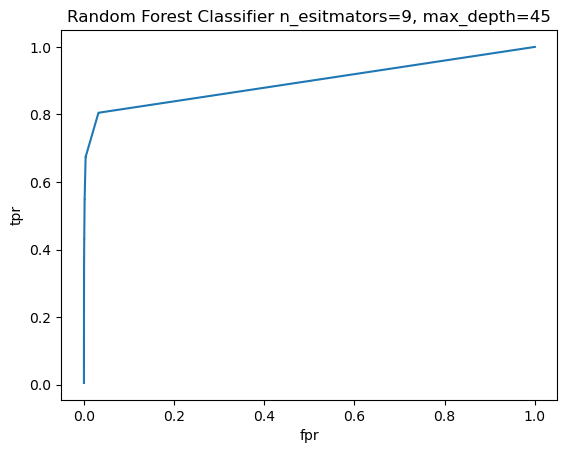

Confusion matrix for the test data from train test split


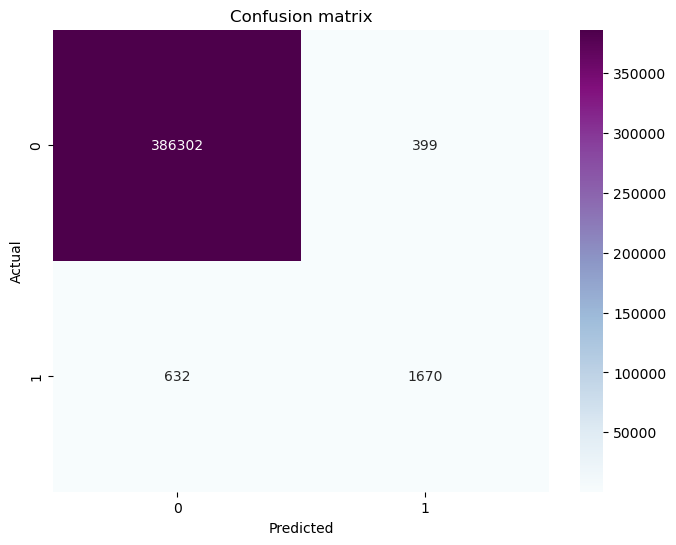

Confusion matrix for the separate test file


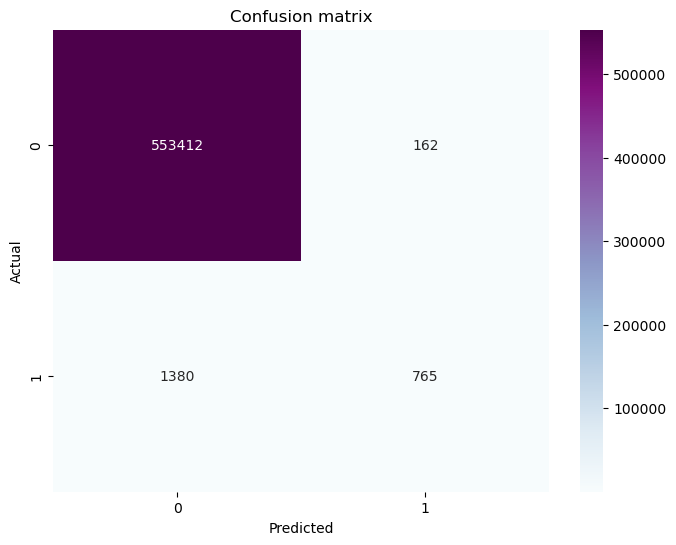

Accuracy of rf_2 model on validation data from test_train_split:  0.9962391035544713
Accuracy of rf_2 model on test data from the separate file:  0.9967501561040741


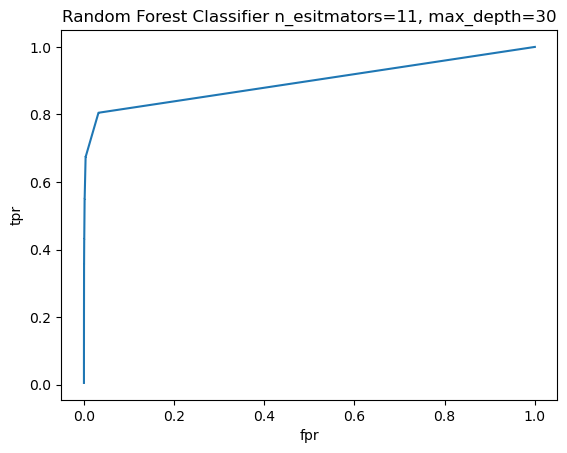

Confusion matrix for the test data from train test split


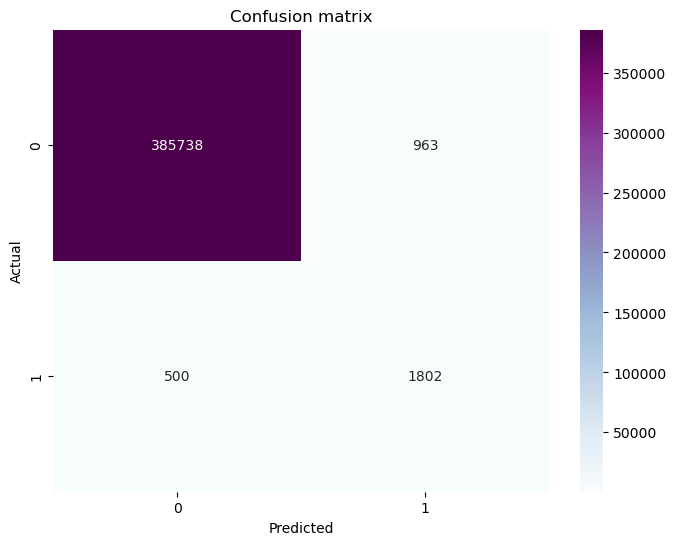

Confusion matrix for the separate test file


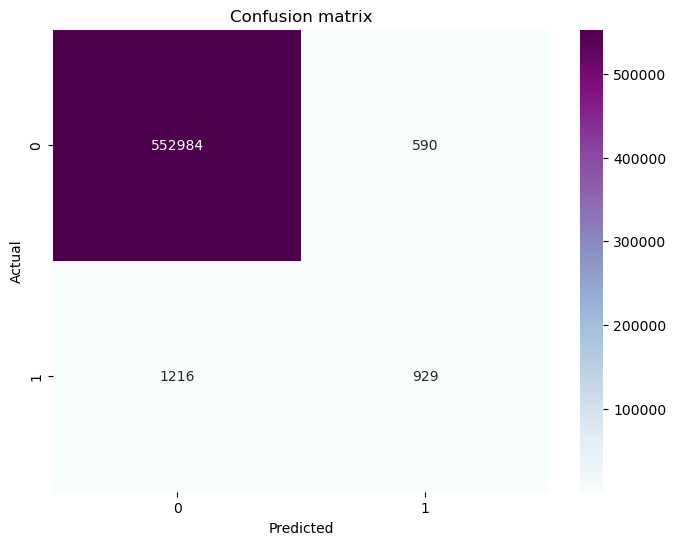

Accuracy of rf_3 model on validation data from test_train_split:  0.9884114004262178
Accuracy of rf_3 model on test data from the separate file:  0.991308557022524


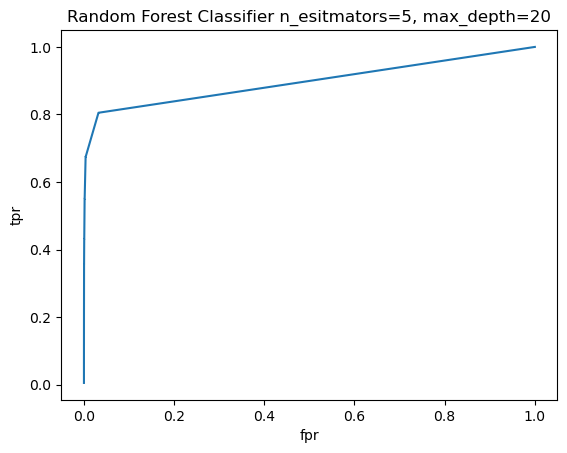

Confusion matrix for the test data from train test split


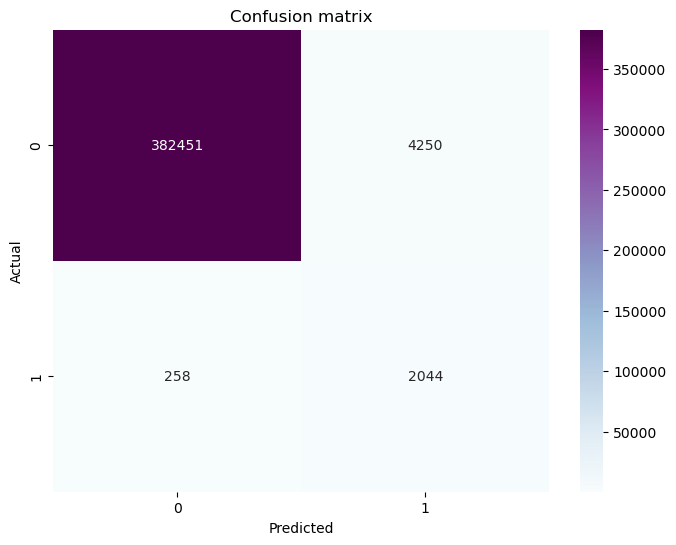

Confusion matrix for the separate test file


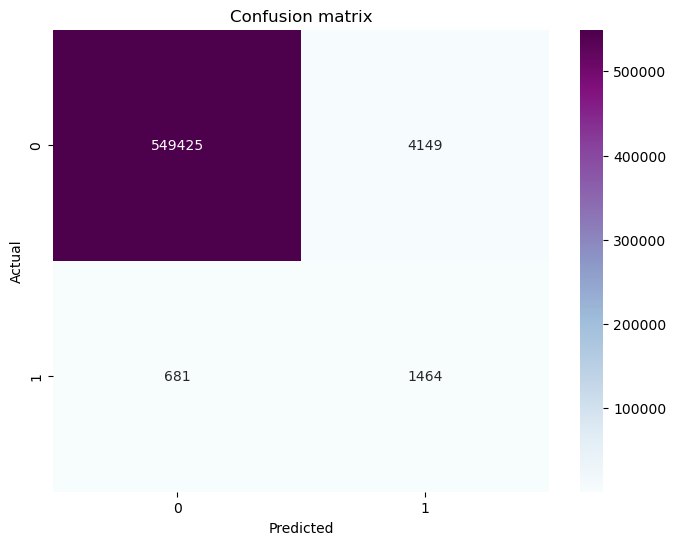

Accuracy of rf_4 model on validation data from test_train_split:  0.979244376007383
Accuracy of rf_4 model on test data from the separate file:  0.9796605838562294


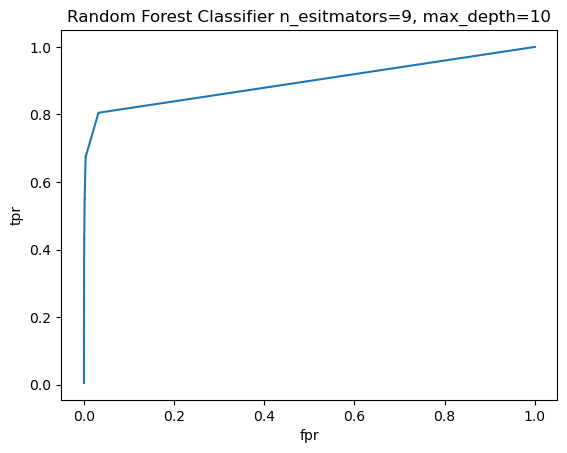

Confusion matrix for the test data from train test split


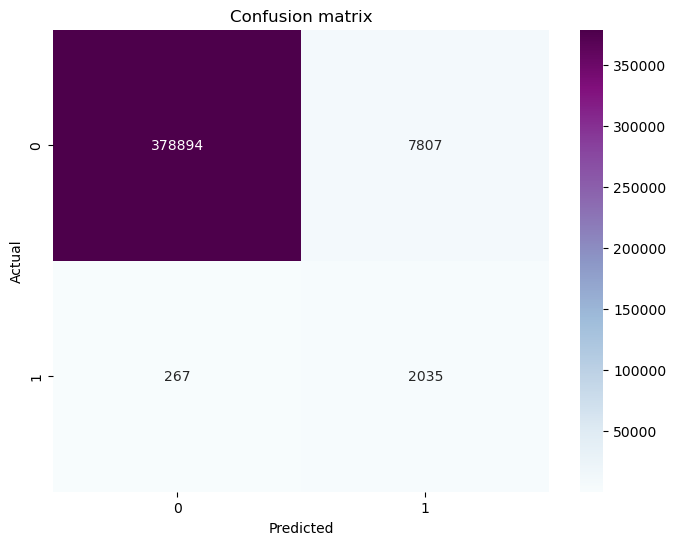

Confusion matrix for the separate test file


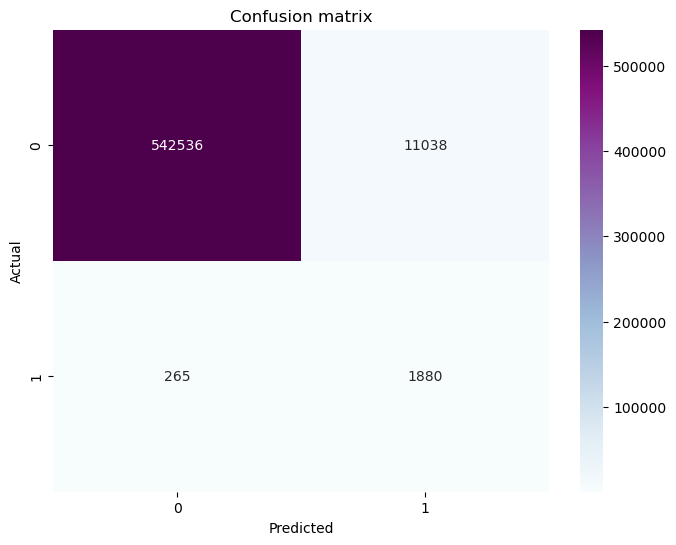

Accuracy of rf_5 model on validation data from test_train_split:  0.9767302565789981
Accuracy of rf_5 model on test data from the separate file:  0.9777279524363932


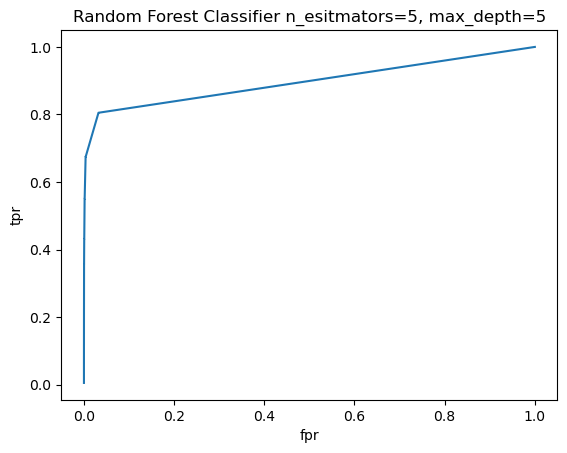

Confusion matrix for the test data from train test split


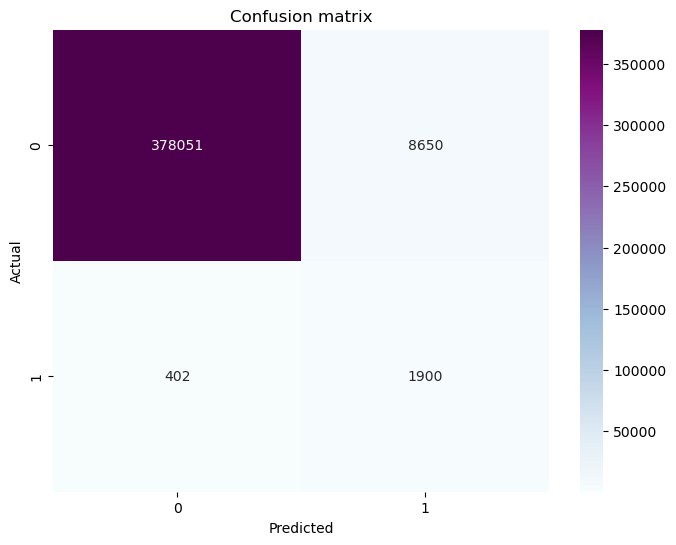

Confusion matrix for the separate test file


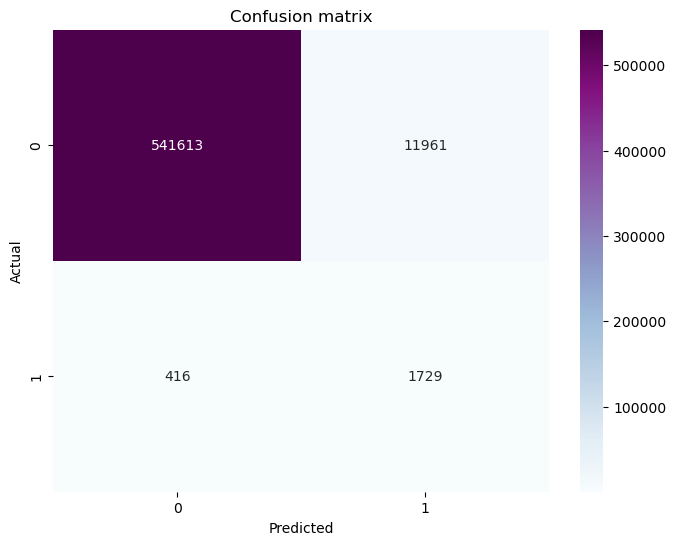

In [17]:
### ROC curve of rf_1
print("Accuracy of rf_1 model on validation data from test_train_split: ",accuracy_score(rf_1.predict(X_test),y_test))
print("Accuracy of rf_1 model on test data from the separate file: ",accuracy_score(rf_1.predict(X_val),y_val))
plot_ROC(test_cleaned_onehot,rf_1,'is_fraud','Random Forest Classifier n_esitmators=9, max_depth=45')


y_true = y_val
y_pred = rf_1.predict(X_test)
y_pred_testfile = rf_1.predict(X_val)
print("Confusion matrix for the test data from train test split")
plot_confusion_matrix(y_test,y_pred)
print("Confusion matrix for the separate test file")
plot_confusion_matrix(y_true,y_pred_testfile)

print("Accuracy of rf_2 model on validation data from test_train_split: ",accuracy_score(rf_2.predict(X_test),y_test))
print("Accuracy of rf_2 model on test data from the separate file: ",accuracy_score(rf_2.predict(X_val),y_val))
plot_ROC(test_cleaned_onehot,rf_1,'is_fraud','Random Forest Classifier n_esitmators=11, max_depth=30')
y_true = y_val
y_pred = rf_2.predict(X_test)
y_pred_testfile = rf_2.predict(X_val)
print("Confusion matrix for the test data from train test split")
plot_confusion_matrix(y_test,y_pred)
print("Confusion matrix for the separate test file")
plot_confusion_matrix(y_true,y_pred_testfile)

print("Accuracy of rf_3 model on validation data from test_train_split: ",accuracy_score(rf_3.predict(X_test),y_test))
print("Accuracy of rf_3 model on test data from the separate file: ",accuracy_score(rf_3.predict(X_val),y_val))
plot_ROC(test_cleaned_onehot,rf_1,'is_fraud','Random Forest Classifier n_esitmators=5, max_depth=20')
y_true = y_val
y_pred = rf_3.predict(X_test)
y_pred_testfile = rf_3.predict(X_val)

print("Confusion matrix for the test data from train test split")
plot_confusion_matrix(y_test,y_pred)
print("Confusion matrix for the separate test file")
plot_confusion_matrix(y_true,y_pred_testfile)

print("Accuracy of rf_4 model on validation data from test_train_split: ",accuracy_score(rf_4.predict(X_test),y_test))
print("Accuracy of rf_4 model on test data from the separate file: ",accuracy_score(rf_4.predict(X_val),y_val))
plot_ROC(test_cleaned_onehot,rf_1,'is_fraud','Random Forest Classifier n_esitmators=9, max_depth=10')
y_true = y_val
y_pred = rf_4.predict(X_test)
y_pred_testfile = rf_4.predict(X_val)

print("Confusion matrix for the test data from train test split")
plot_confusion_matrix(y_test,y_pred)
print("Confusion matrix for the separate test file")
plot_confusion_matrix(y_true,y_pred_testfile)

print("Accuracy of rf_5 model on validation data from test_train_split: ",accuracy_score(rf_5.predict(X_test),y_test))
print("Accuracy of rf_5 model on test data from the separate file: ",accuracy_score(rf_5.predict(X_val),y_val))
plot_ROC(test_cleaned_onehot,rf_1,'is_fraud','Random Forest Classifier n_esitmators=5, max_depth=5')
y_true = y_val
y_pred = rf_5.predict(X_test)
y_pred_testfile = rf_5.predict(X_val)

print("Confusion matrix for the test data from train test split")
plot_confusion_matrix(y_test,y_pred)
print("Confusion matrix for the separate test file")
plot_confusion_matrix(y_true,y_pred_testfile)



<p> By using a Random Forest Classifier it seems that the modes with better accuracy tend to have a greater type 2 error rate than models with lesser accuracy on the validation data. It also occurs that models with a smaller depth and a smaller n_estimators tend to classify fraudulet transactions better. The most promising model out of the five tested ones seems to be the classifier with n_estimators=9 and max_depth=10. At first we trained a model where we dropped the job category but after feature engineering all the jobs and separating them into 10 categories the model improved significantly. This was achieved with a training dataset that was oversampled. Now it's worth investigating if an undersampled dataset would work aswell, as it would reduce the training time for each model</p>

In [18]:
rf_1 = RandomForestClassifier(n_estimators=9, max_depth=45, random_state=0).fit(X_train_under, y_train_under)
rf_2 = RandomForestClassifier(n_estimators=11, max_depth=30, random_state=0).fit(X_train_under, y_train_under)
rf_3 = RandomForestClassifier(n_estimators=5, max_depth=20, random_state=0).fit(X_train_under, y_train_under)
rf_4 = RandomForestClassifier(n_estimators=9, max_depth=10, random_state=0).fit(X_train_under, y_train_under)
rf_5 = RandomForestClassifier(n_estimators=5, max_depth=5, random_state=0).fit(X_train_under, y_train_under)


Accuracy of rf_1 model on validation data from test_train_split:  0.9845377472749294
Accuracy of rf_1 model on test data from the separate file:  0.9894838938384327


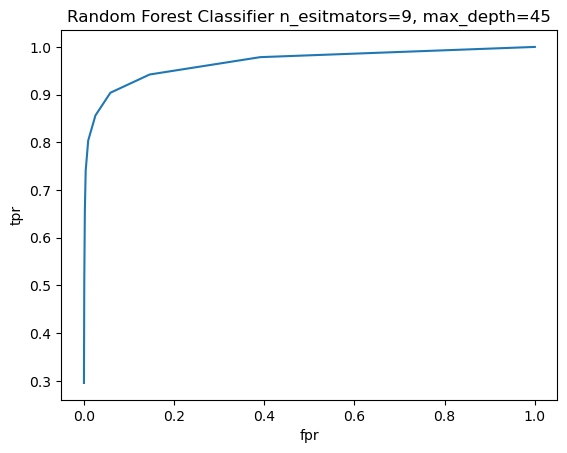

Confusion matrix for the test data from train test split


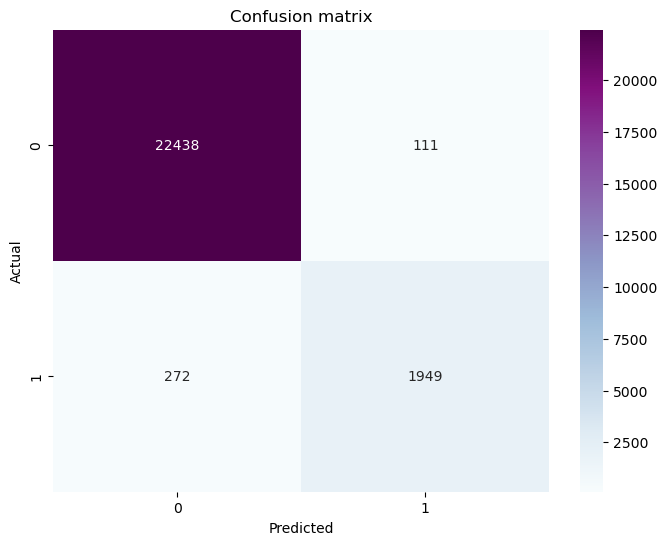

Confusion matrix for the separate test file


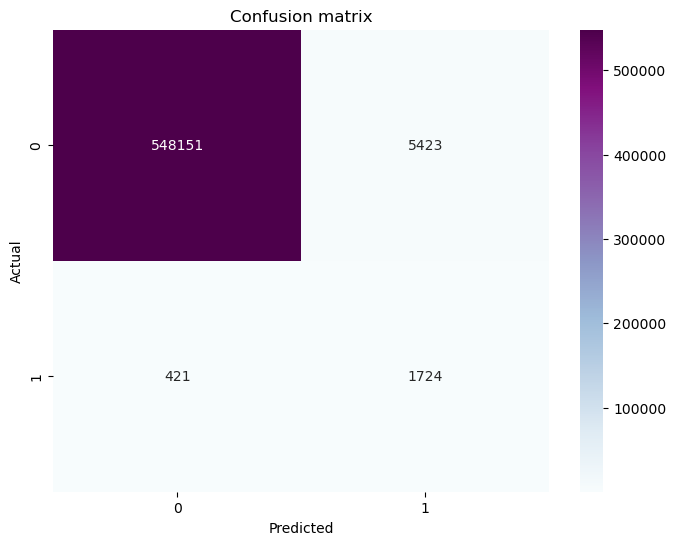

Accuracy of rf_2 model on validation data from test_train_split:  0.9848607186112233
Accuracy of rf_2 model on test data from the separate file:  0.9893435351319642


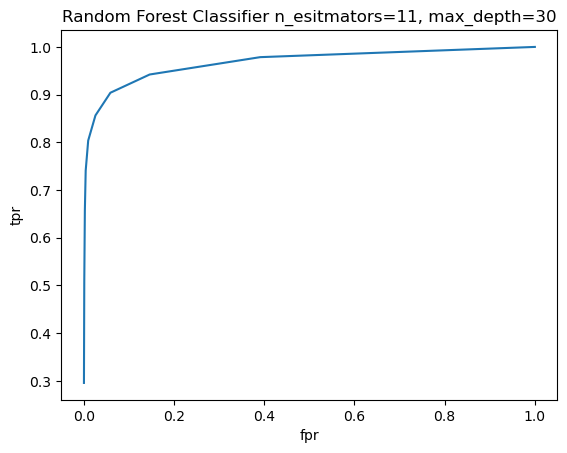

Confusion matrix for the test data from train test split


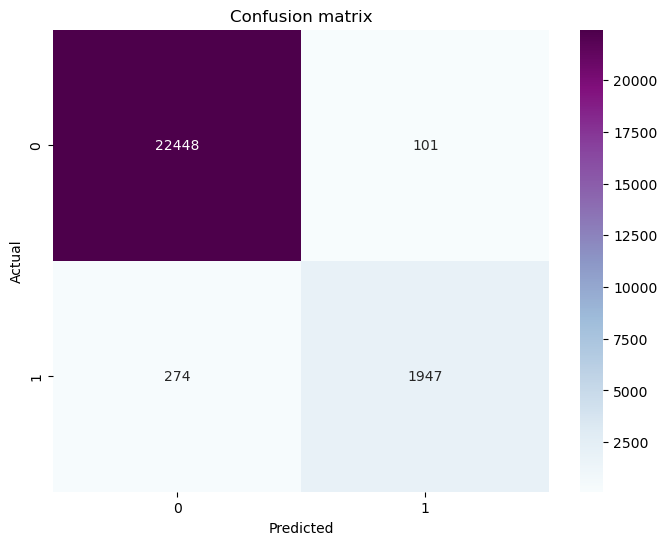

Confusion matrix for the separate test file


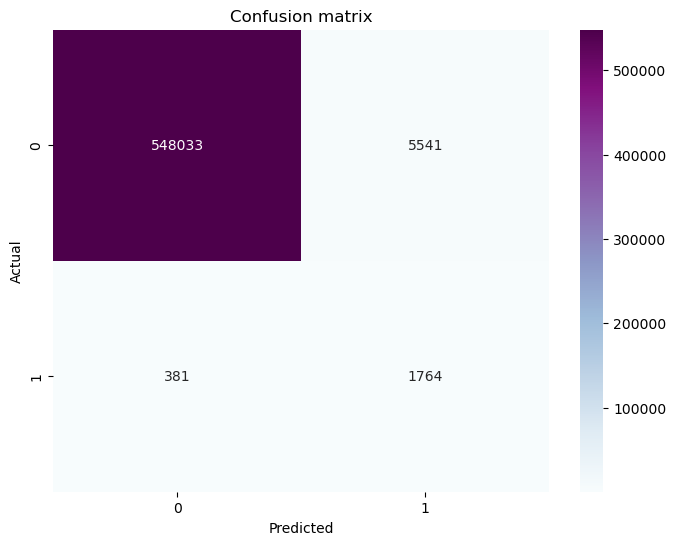

Accuracy of rf_3 model on validation data from test_train_split:  0.9823173193379088
Accuracy of rf_3 model on test data from the separate file:  0.9871355847109781


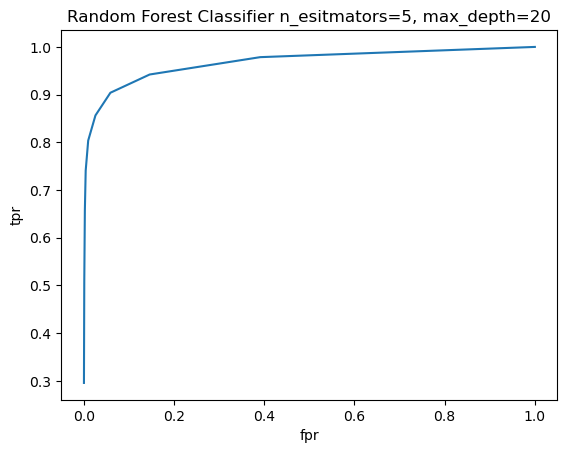

Confusion matrix for the test data from train test split


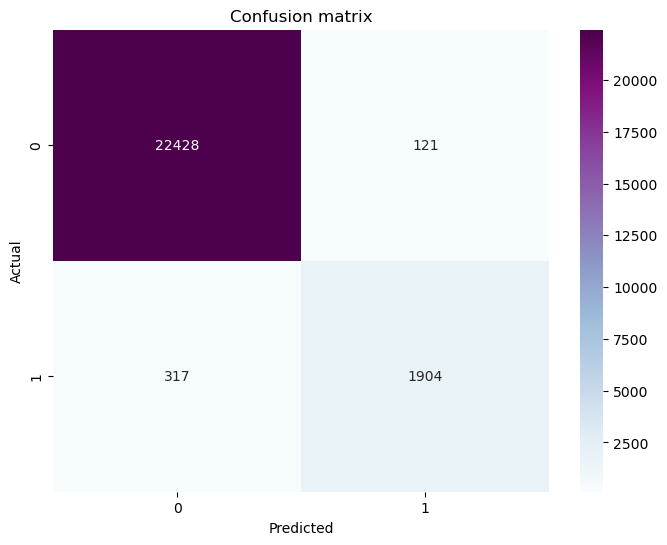

Confusion matrix for the separate test file


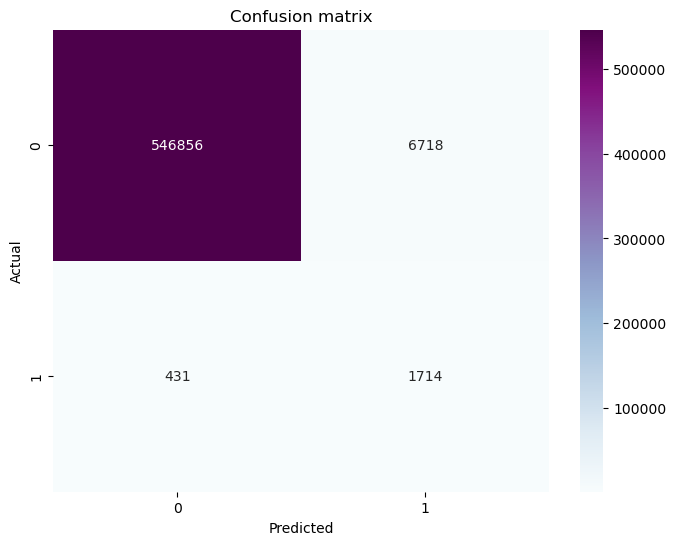

Accuracy of rf_4 model on validation data from test_train_split:  0.9786031489705289
Accuracy of rf_4 model on test data from the separate file:  0.9938314147977665


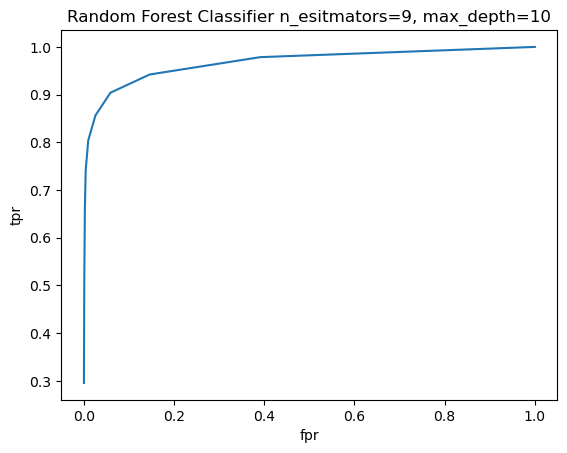

Confusion matrix for the test data from train test split


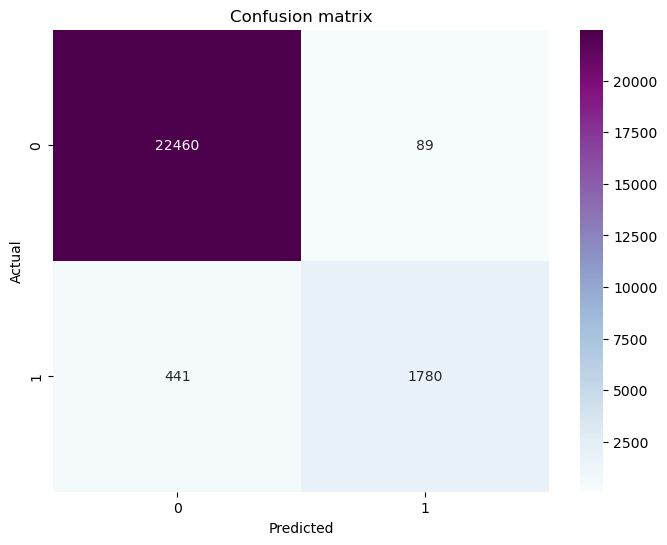

Confusion matrix for the separate test file


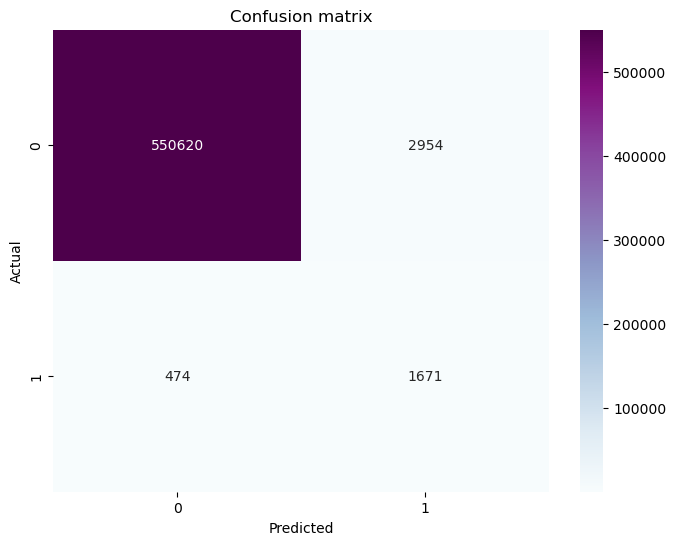

Accuracy of rf_5 model on validation data from test_train_split:  0.9668146951958013
Accuracy of rf_5 model on test data from the separate file:  0.9884437998340888


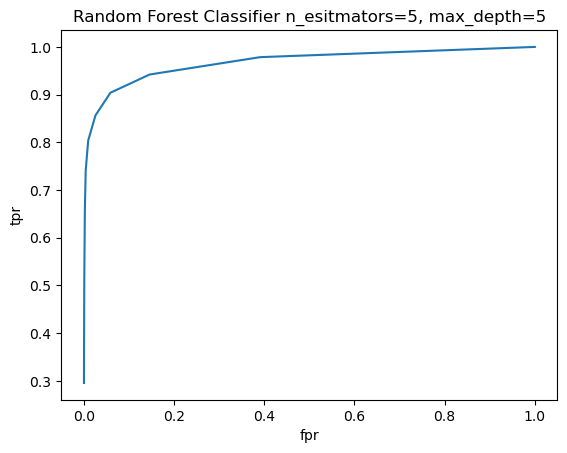

Confusion matrix for the test data from train test split


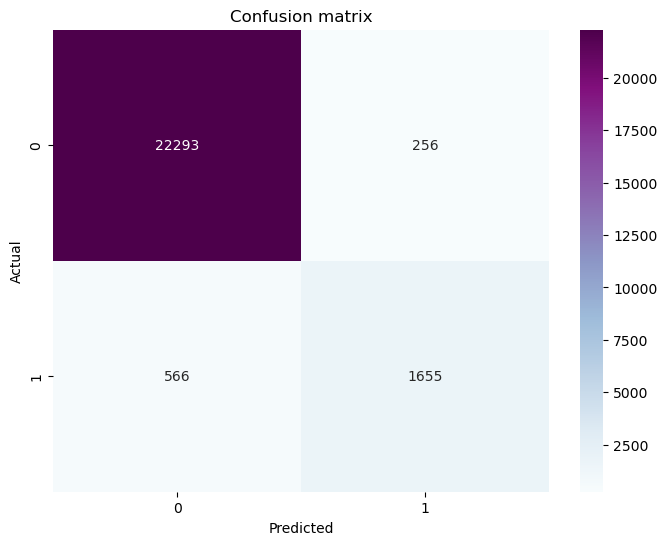

Confusion matrix for the separate test file


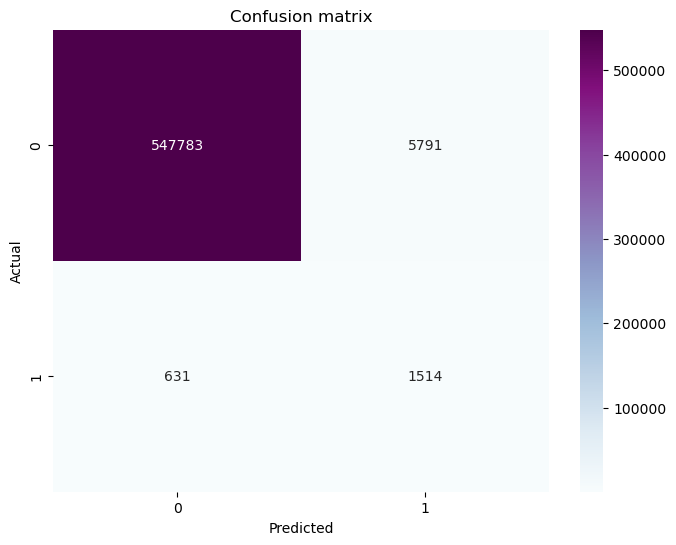

In [19]:

print("Accuracy of rf_1 model on validation data from test_train_split: ",accuracy_score(rf_1.predict(X_test_under),y_test_under))
print("Accuracy of rf_1 model on test data from the separate file: ",accuracy_score(rf_1.predict(X_val),y_val))
plot_ROC(test_cleaned_onehot,rf_1,'is_fraud','Random Forest Classifier n_esitmators=9, max_depth=45')


y_true = y_val
y_pred = rf_1.predict(X_test_under)
y_pred_testfile = rf_1.predict(X_val)
print("Confusion matrix for the test data from train test split")
plot_confusion_matrix(y_test_under,y_pred)
print("Confusion matrix for the separate test file")
plot_confusion_matrix(y_true,y_pred_testfile)

print("Accuracy of rf_2 model on validation data from test_train_split: ",accuracy_score(rf_2.predict(X_test_under),y_test_under))
print("Accuracy of rf_2 model on test data from the separate file: ",accuracy_score(rf_2.predict(X_val),y_val))
plot_ROC(test_cleaned_onehot,rf_1,'is_fraud','Random Forest Classifier n_esitmators=11, max_depth=30')
y_true = y_val
y_pred = rf_2.predict(X_test_under)
y_pred_testfile = rf_2.predict(X_val)
print("Confusion matrix for the test data from train test split")
plot_confusion_matrix(y_test_under,y_pred)
print("Confusion matrix for the separate test file")
plot_confusion_matrix(y_true,y_pred_testfile)

print("Accuracy of rf_3 model on validation data from test_train_split: ",accuracy_score(rf_3.predict(X_test_under),y_test_under))
print("Accuracy of rf_3 model on test data from the separate file: ",accuracy_score(rf_3.predict(X_val),y_val))
plot_ROC(test_cleaned_onehot,rf_1,'is_fraud','Random Forest Classifier n_esitmators=5, max_depth=20')
y_true = y_val
y_pred = rf_3.predict(X_test_under)
y_pred_testfile = rf_3.predict(X_val)

print("Confusion matrix for the test data from train test split")
plot_confusion_matrix(y_test_under,y_pred)
print("Confusion matrix for the separate test file")
plot_confusion_matrix(y_true,y_pred_testfile)

print("Accuracy of rf_4 model on validation data from test_train_split: ",accuracy_score(rf_4.predict(X_test_under),y_test_under))
print("Accuracy of rf_4 model on test data from the separate file: ",accuracy_score(rf_4.predict(X_val),y_val))
plot_ROC(test_cleaned_onehot,rf_1,'is_fraud','Random Forest Classifier n_esitmators=9, max_depth=10')
y_true = y_val
y_pred = rf_4.predict(X_test_under)
y_pred_testfile = rf_4.predict(X_val)

print("Confusion matrix for the test data from train test split")
plot_confusion_matrix(y_test_under,y_pred)
print("Confusion matrix for the separate test file")
plot_confusion_matrix(y_true,y_pred_testfile)

print("Accuracy of rf_5 model on validation data from test_train_split: ",accuracy_score(rf_5.predict(X_test_under),y_test_under))
print("Accuracy of rf_5 model on test data from the separate file: ",accuracy_score(rf_5.predict(X_val),y_val))
plot_ROC(test_cleaned_onehot,rf_1,'is_fraud','Random Forest Classifier n_esitmators=5, max_depth=5')
y_true = y_val
y_pred = rf_5.predict(X_test_under)
y_pred_testfile = rf_5.predict(X_val)

print("Confusion matrix for the test data from train test split")
plot_confusion_matrix(y_test_under,y_pred)
print("Confusion matrix for the separate test file")
plot_confusion_matrix(y_true,y_pred_testfile)



<h3> Idea for optimizing the Random Forest Classifier </h3>
<p> As we were training our models, the Descision Tree Classifier could outperform the Random Forest with a lower type 2 error when grid search was run to optimize the hyperparameter. As a result a similar idea will be tested on the Random forest to see, if we can reach even better results</p>

In [30]:



param_grid = {
    'n_estimators': np.arange(10, 100, 10),
    'max_depth': np.arange(10, 100, 10)
}

start = time.time()

rf = RandomForestClassifier(random_state=0)
grid_search = GridSearchCV(rf, param_grid)
grid_search.fit(X_train_under, y_train_under)
best_params = grid_search.best_params_

end = time.time()

print(f"Best Parameters: {best_params}")
execution_time = (end - start) / 60 #find out how long this takes in minutes
print(f'Execution time: {execution_time}')

##Best Parameters: {'max_depth': 30, 'n_estimators': 35}
##Execution time: 23.09341367483139

Best Parameters: {'max_depth': 30, 'n_estimators': 70}
Execution time: 44.670106728871666


Accuracy of model on validation data from test_train_split:  0.9850222042793702
Accuracy of model on test data from the separate file:  0.9941697152697676


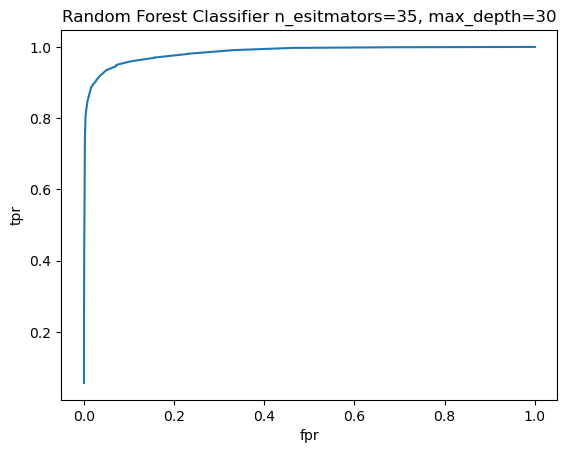

Confusion matrix for the test data from train test split


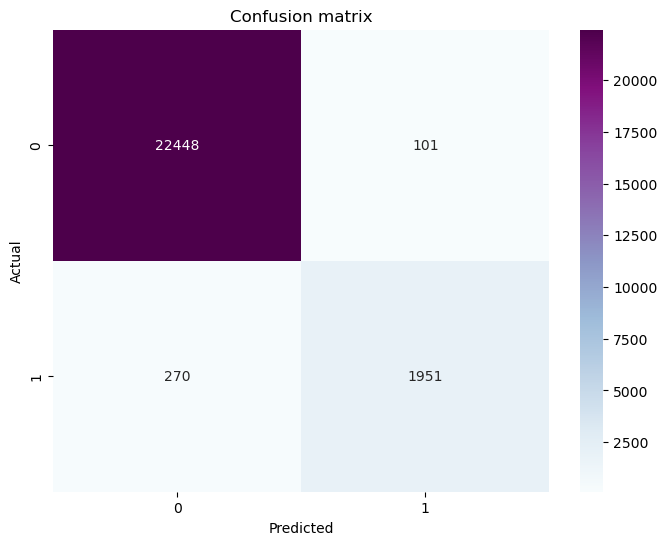

Confusion matrix for the separate test file


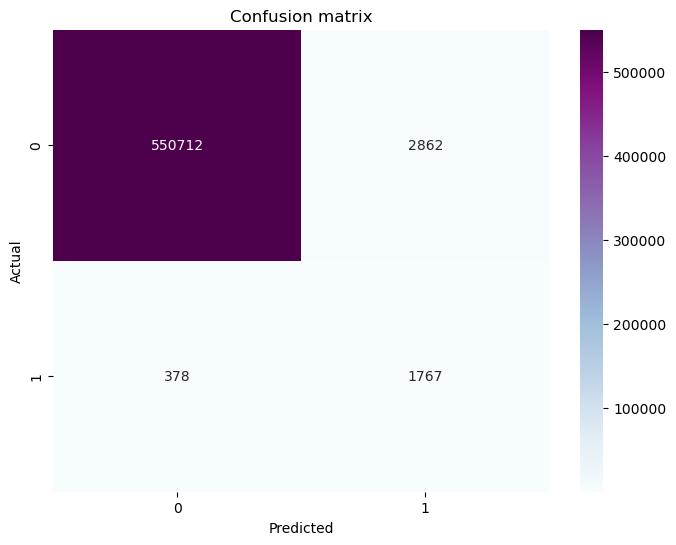

In [29]:
rf_undersampled_bestgrid = RandomForestClassifier(n_estimators=35,max_depth=30).fit(X_train_under,y_train_under)

print("Accuracy of model on validation data from test_train_split: ",accuracy_score(rf_undersampled_bestgrid.predict(X_test_under),y_test_under))
print("Accuracy of model on test data from the separate file: ",accuracy_score(rf_undersampled_bestgrid.predict(X_val),y_val))
plot_ROC(test_cleaned_onehot,rf_undersampled_bestgrid,'is_fraud','Random Forest Classifier n_esitmators=35, max_depth=30')
y_true = y_val
y_pred = rf_undersampled_bestgrid.predict(X_test_under)
y_pred_testfile = rf_undersampled_bestgrid.predict(X_val)

print("Confusion matrix for the test data from train test split")
plot_confusion_matrix(y_test_under,y_pred)
print("Confusion matrix for the separate test file")
plot_confusion_matrix(y_true,y_pred_testfile)


<h3> Descision Tree Classifier</h3>

[Text(0.5634502242119559, 0.9918032786885246, 'x[0] <= 235.655\ngini = 0.5\nsamples = 1804936\nvalue = [902468, 902468]'),
 Text(0.3349297809182128, 0.9754098360655737, 'x[0] <= 24.255\ngini = 0.318\nsamples = 1093837\nvalue = [876965, 216872]'),
 Text(0.27413176717246074, 0.9590163934426229, 'x[12] <= 0.5\ngini = 0.463\nsamples = 502393\nvalue = [319348, 183045]'),
 Text(0.209399974736681, 0.9426229508196722, 'x[0] <= 16.985\ngini = 0.382\nsamples = 430007\nvalue = [319286, 110721]'),
 Text(0.12370847053360351, 0.9262295081967213, 'x[13] <= 0.5\ngini = 0.268\nsamples = 332176\nvalue = [279193, 52983]'),
 Text(0.08509846757852077, 0.9098360655737705, 'x[19] <= 0.5\ngini = 0.211\nsamples = 316236\nvalue = [278321, 37915]'),
 Text(0.044389564336372846, 0.8934426229508197, 'x[23] <= 0.5\ngini = 0.134\nsamples = 268801\nvalue = [249400, 19401]'),
 Text(0.015281999324552516, 0.8770491803278688, 'x[17] <= 0.5\ngini = 0.056\nsamples = 232008\nvalue = [225271, 6737]'),
 Text(0.0043904086457277

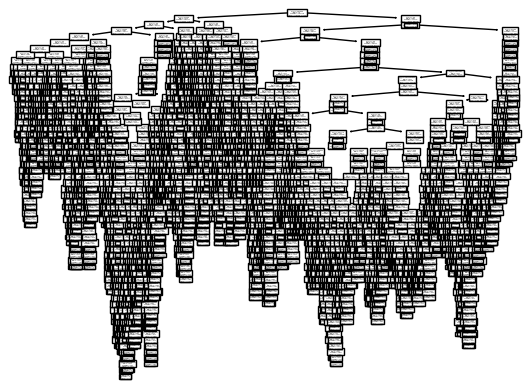

In [20]:
from sklearn import tree

decision_tree = tree.DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
tree.plot_tree(decision_tree)

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree
import time

### DONT RUN THIS, IT TAKES AGES just trust the next cell for values

#param_grid = {
#    'max_depth': np.arange(3, 15, 2),
#    'min_samples_split': np.arange(10, 500, 20) 
#}

#start = time.time()

#tree_clf = tree.DecisionTreeClassifier()
#grid_search = GridSearchCV(tree_clf, param_grid)
#grid_search.fit(X_train, y_train)
#best_params = grid_search.best_params_

#end = time.time()

#print(f"Best Parameters: {best_params}")
#execution_time = (end - start) / 60 #find out how long this takes in minutes
#print(f'Execution time: {execution_time}')

[Text(0.795360668285473, 0.9642857142857143, 'x[0] <= 235.655\ngini = 0.5\nsamples = 1804936\nvalue = [902468, 902468]'),
 Text(0.6266166068412162, 0.8928571428571429, 'x[0] <= 24.255\ngini = 0.318\nsamples = 1093837\nvalue = [876965, 216872]'),
 Text(0.49183118665540543, 0.8214285714285714, 'x[12] <= 0.5\ngini = 0.463\nsamples = 502393\nvalue = [319348, 183045]'),
 Text(0.40923247466216217, 0.75, 'x[0] <= 16.985\ngini = 0.382\nsamples = 430007\nvalue = [319286, 110721]'),
 Text(0.322265625, 0.6785714285714286, 'x[13] <= 0.5\ngini = 0.268\nsamples = 332176\nvalue = [279193, 52983]'),
 Text(0.23405827702702703, 0.6071428571428571, 'x[19] <= 0.5\ngini = 0.211\nsamples = 316236\nvalue = [278321, 37915]'),
 Text(0.13154560810810811, 0.5357142857142857, 'x[23] <= 0.5\ngini = 0.134\nsamples = 268801\nvalue = [249400, 19401]'),
 Text(0.05405405405405406, 0.4642857142857143, 'x[17] <= 0.5\ngini = 0.056\nsamples = 232008\nvalue = [225271, 6737]'),
 Text(0.02195945945945946, 0.39285714285714285,

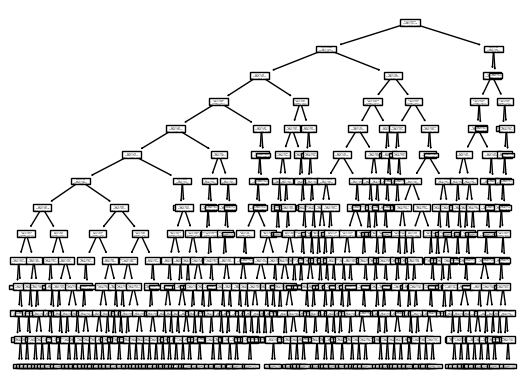

In [22]:


tree2 = tree.DecisionTreeClassifier(max_depth=13, min_samples_split=70)
tree2.fit(X_train, y_train)
tree.plot_tree(tree2)

Confusion matrix for the test data from train test split


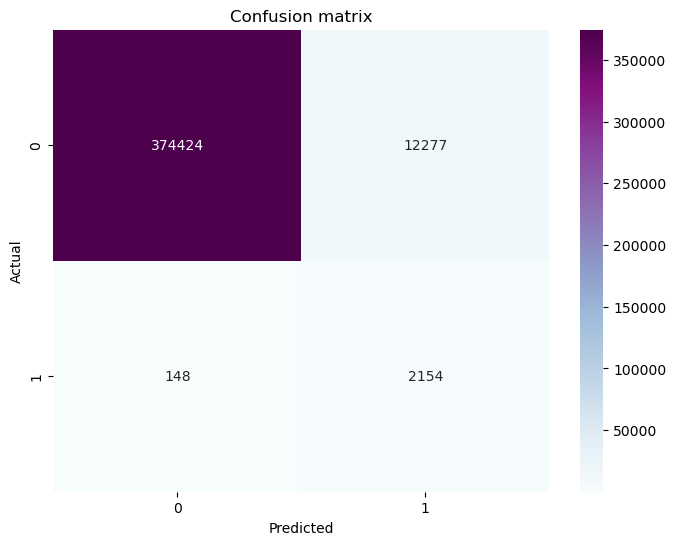

Confusion matrix for the separate test file


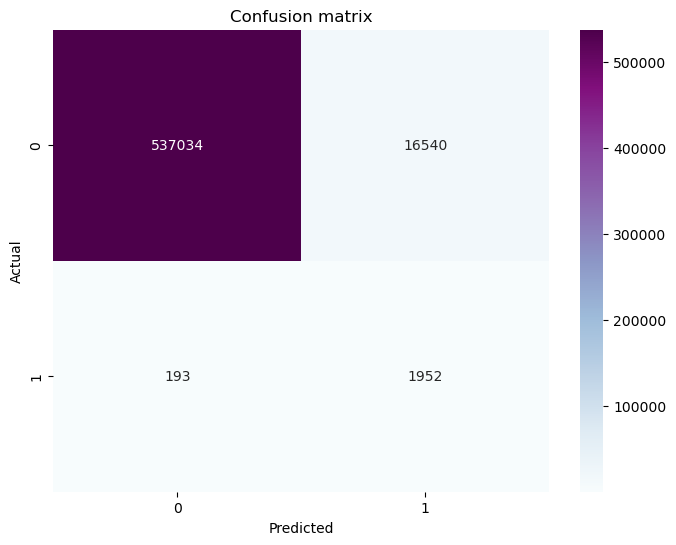

In [23]:
y_true = y_val
y_pred = tree2.predict(X_test)
y_pred_testfile = tree2.predict(X_val)
print("Confusion matrix for the test data from train test split")
plot_confusion_matrix(y_test,y_pred)
print("Confusion matrix for the separate test file")
plot_confusion_matrix(y_true,y_pred_testfile)

In [24]:
print("Accuracy of dt_1 model on test data from test_train_split: ",accuracy_score(decision_tree.predict(X_test),y_test))
print("Accuracy of dt_1 model on validation data from the separate file: ",accuracy_score(decision_tree.predict(X_val),y_val))

y_true = y_val
y_pred = decision_tree.predict(X_val)


print(test_data['is_fraud'].value_counts())
print(confusion_matrix(y_true,y_pred))

Accuracy of dt_1 model on test data from test_train_split:  0.996521877723308
Accuracy of dt_1 model on validation data from the separate file:  0.9967015703979889
0    553574
1      2145
Name: is_fraud, dtype: int64
[[553265    309]
 [  1524    621]]
